# TEST: pyVolcano with a real dataset
Kernel: `volcano`<br>
**Author: Juan Sebastian Diaz Boada**<br>
*juan.sebastian.diaz.boada@ki.se*<br>
08/07/22

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import pyVolcano as pv

In [3]:
in_file = '../data/DE_data.csv'
pval = 0.01
log2F = 1
gene_col = 'row'
pval_col = 'padj'
log_col = 'log2FoldChange'
n_names2show = 10
title = 'No_cell_comp'
up_color = 'green'
down_color = 'red'

### Loads dataset

In [4]:
file_type = in_file.split('.')[-1]
if file_type == 'tsv':
    DF = pd.read_csv(in_file,sep='\t',index_col=0).reset_index(drop=True)
elif file_type == 'xlsx':
    DF = pd.read_excel(in_file,index_col=0)
elif file_type == 'csv':
    DF = pd.read_csv(in_file,sep=',',index_col=0).reset_index(drop=True)
else:
    raise NameError("Invalid input format. Has to be either .tsv, .csv or .xlsx.")

In [5]:
DF.design.unique()

array(['No_cell_comp'], dtype=object)

In [6]:
DF = DF.loc[DF['design']=='No_cell_comp']
DF

,row,log2FoldChange,padj,design,DE
0,ENSG00000278267,-0.175689,0.701615,No_cell_comp,NO
1,ENSG00000238009,-0.331684,0.481832,No_cell_comp,NO
2,ENSG00000239906,-0.338826,0.587608,No_cell_comp,NO
3,ENSG00000241860,-0.380158,0.188621,No_cell_comp,NO
4,ENSG00000222623,0.121562,0.938411,No_cell_comp,NO
...,...,...,...,...,...
28354,ENSG00000198695,1.757460,0.000385,No_cell_comp,UP
28355,ENSG00000210194,3.145639,0.001141,No_cell_comp,UP
28356,ENSG00000198727,0.005482,0.994661,No_cell_comp,NO
28357,ENSG00000210195,-0.273726,0.714065,No_cell_comp,NO


In [7]:
DF.loc[(DF[log_col]>log2F) & (DF[pval_col]<pval),:]

,row,log2FoldChange,padj,design,DE
105,ENSG00000142611,2.362944,0.001124,No_cell_comp,UP
114,ENSG00000078900,1.437207,0.001141,No_cell_comp,UP
302,ENSG00000186510,2.017775,0.006603,No_cell_comp,UP
332,ENSG00000204362,3.817617,0.005424,No_cell_comp,UP
369,ENSG00000158786,3.018154,0.002881,No_cell_comp,UP
...,...,...,...,...,...
28203,ENSG00000183778,3.338242,0.001808,No_cell_comp,UP
28205,ENSG00000171587,3.277691,0.003264,No_cell_comp,UP
28335,ENSG00000210107,2.459060,0.000066,No_cell_comp,UP
28354,ENSG00000198695,1.757460,0.000385,No_cell_comp,UP


## Plot

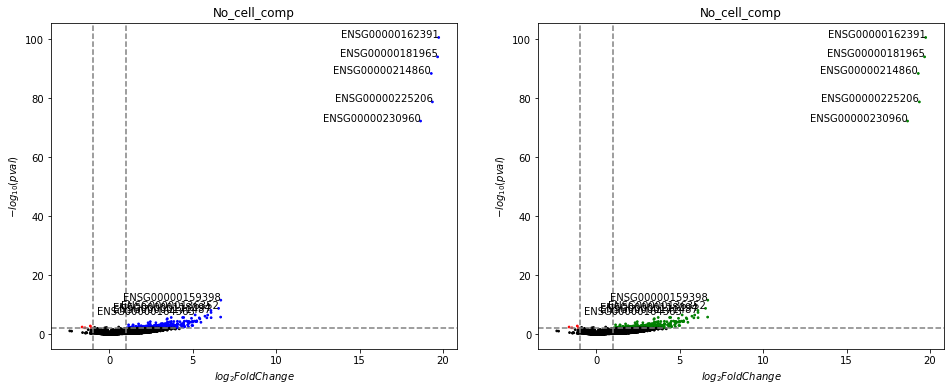

In [8]:
fig,ax = plt.subplots(1,2,figsize=[16,6])
ax[0] = pv.volcano(DF,ax[0],pval=pval,log2F=log2F,gene_col=gene_col,pval_col=pval_col,
                 log_col=log_col,n_names2show = n_names2show,title = title,
                 up_color='blue',down_color=down_color)
ax[1] = pv.volcano(DF,ax[1],pval=pval,log2F=log2F,gene_col=gene_col,pval_col=pval_col,
                 log_col=log_col,n_names2show = n_names2show,title = title,
                 up_color=up_color,down_color=down_color)
plt.show()